In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_csv('/content/sample_data/catsvsdogs_features_SqueezeNet_1.csv')
df.isna().sum()

,0
0,0
0.364,0
2.496,0
0.269,0
0.0,0
...,...
2.277,0
4.903,0
0.381,0
7.209,0


In [ ]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, theta, lambda_reg):
    """
    Compute the cost function with L2 regularization.

    Args:
        X: Feature matrix with bias term
        y: Target labels
        theta: Model parameters
        lambda_reg: Regularization parameter

    Returns:
        cost: Regularized cost value
    """
    m = len(y)
    h = sigmoid(X @ theta)

    # Logistic regression cost
    cost = -(1/m) * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))

    # Add L2 regularization term (exclude bias term)
    reg_term = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)
    cost = cost + reg_term

    return cost


def gradient_descent(X, y, theta, alpha, num_iters, lambda_reg):
    """
    Perform gradient descent with L2 regularization.

    Args:
        X: Feature matrix with bias term
        y: Target labels
        theta: Initial parameters
        alpha: Learning rate
        num_iters: Number of iterations
        lambda_reg: Regularization parameter

    Returns:
        theta: Optimized parameters
        cost_history: List of cost values during training
    """
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))

        # Add gradient of regularization term
        reg_gradient = (lambda_reg / m) * theta
        reg_gradient[0] = 0  # Do not regularize the bias term
        gradient += reg_gradient

        theta -= alpha * gradient
        cost = compute_cost(X, y, theta, lambda_reg)
        print(f"Cost = {cost}")
        cost_history.append(cost)

    return theta, cost_history


def feature_scaling(X):
    """Standardize features (z-score normalization)."""
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)


def load_and_preprocess_data(filepath):
    """
    Load and preprocess the cats vs dogs dataset.

    Args:
        filepath: Path to the CSV file

    Returns:
        X_processed: Processed feature matrix with bias term
        y_processed: Target labels as column vector
        raw_data: Original dataframe
    """
    try:
        # Load the dataset
        data = pd.read_csv(filepath)
        print("Dataset loaded successfully.")
        print(f"Dataset shape: {data.shape}")
        print("\nFirst 5 rows:")
        print(data.head())

        # Separate features and labels (assume last column is the label)
        X = data.iloc[:, :-1].values
        y = data.iloc[:, -1].values

        # Feature scaling
        X_scaled = feature_scaling(X)

        # Add bias term
        X_with_bias = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

        # Reshape y to column vector
        y_reshaped = y.reshape(-1, 1)

        return X_with_bias, y_reshaped, data

    except FileNotFoundError:
        print(f"Error: {filepath} not found.")
        print("Please make sure the file exists at the specified path.")
        return None, None, None


def train_model(X, y, alpha=0.1, num_iters=1000, lambda_reg=0.01):
    """
    Train the logistic regression model with regularization.

    Args:
        X: Feature matrix with bias term
        y: Target labels
        alpha: Learning rate
        num_iters: Number of iterations
        lambda_reg: Regularization parameter

    Returns:
        theta: Trained parameters
        cost_history: Training cost history
    """
    # Initialize parameters
    theta = np.zeros((X.shape[1], 1))

    # Train using gradient descent with regularization
    theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters, lambda_reg)

    print(f"Training completed!")
    print(f"Final parameters shape: {theta.shape}")
    # print(f"Final cost: {cost_history[-1]:.6f}")

    return theta, cost_history


def make_predictions(X, theta):
    """
    Make predictions using the trained model.

    Args:
        X: Feature matrix with bias term
        theta: Trained parameters

    Returns:
        probabilities: Predicted probabilities
        predicted_classes: Predicted class labels
    """
    probabilities = sigmoid(X @ theta)
    predicted_classes = (probabilities > 0.5).astype(int)

    return probabilities, predicted_classes


def evaluate_model(y_true, y_pred):
    """
    Evaluate model performance.

    Args:
        y_true: True labels
        y_pred: Predicted labels
    """
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    return accuracy


def plot_cost_history(cost_history, title="Cost Function Convergence"):
    """Plot the cost function convergence."""
    plt.figure(figsize=(10, 6))
    plt.plot(np.squeeze(cost_history))
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()

=== Cats vs Dogs Logistic Regression with Regularization ===

1. Loading and preprocessing data...
Dataset loaded successfully.
Dataset shape: (11632, 514)

First 5 rows:
   0   0.364  2.496  0.269    0.0   1.936  0.0.1  2.474  0.078  9.922  ...  \
0  1   0.826  6.313  0.000  1.050   2.799  0.253  2.210  2.462  2.055  ...   
1  2   0.096  8.977  0.034  0.642  14.419  0.191  0.359  1.011  3.403  ...   
2  3  10.767  1.540  0.836  1.429   2.764  0.000  3.294  0.724  0.899  ...   
3  4   1.738  1.957  0.920  0.907   1.318  0.073  0.936  1.102  0.761  ...   
4  5   2.452  1.567  7.992  2.290   4.671  0.452  0.763  0.461  2.001  ...   

   11.256  3.955  4.388  8.537   0.02   2.277  4.903  0.381   7.209  1.0  
0   2.202  0.000  0.369  0.000  0.000   1.594  0.024  3.787   7.847  1.0  
1   0.065  0.135  4.759  0.706  0.000   0.832  0.000  1.697   0.103  1.0  
2   3.799  2.047  6.838  0.543  5.967   3.367  4.987  1.541   7.214  0.0  
3   3.161  2.924  6.030  0.992  0.848   2.457  0.000  0.579 

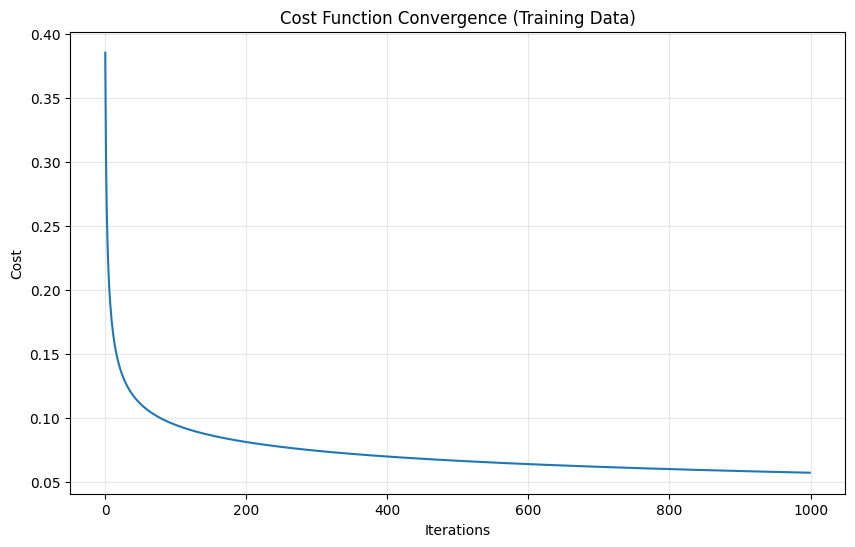


5. Making predictions on the test set...
First 5 predictions on test set (probabilities):
[0.8527517  0.99997204 0.00174529 0.00215748 0.99955472]
First 5 predicted classes on test set:
[1 1 0 0 1]

6. Evaluating model performance on the test set...
--- Test Set Evaluation ---
Accuracy: 0.9682

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1156
         1.0       0.98      0.96      0.97      1171

    accuracy                           0.97      2327
   macro avg       0.97      0.97      0.97      2327
weighted avg       0.97      0.97      0.97      2327


--- Training Set Evaluation ---
Accuracy: 0.9805

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4754
         1.0       0.98      0.98      0.98      4551

    accuracy                           0.98      9305
   macro avg       0.98      0.98      0.98      9305
weighte

In [ ]:
if __name__ == "__main__":
    # Configuration parameters
    FILEPATH = '/content/sample_data/catsvsdogs_features_SqueezeNet_1.csv'
    LEARNING_RATE = 0.1
    NUM_ITERATIONS = 1000
    LAMBDA_REG = 0.01
    TEST_SIZE = 0.2 # Percentage of data to use for testing

    print("=== Cats vs Dogs Logistic Regression with Regularization ===\n")

    # Load and preprocess data
    print("1. Loading and preprocessing data...")
    X_processed, y_processed, raw_data = load_and_preprocess_data(FILEPATH)

    if X_processed is not None:
        print(f"Processed data shape: X={X_processed.shape}, y={y_processed.shape}")

        # Split data into training and testing sets
        print(f"\n2. Splitting data into training and testing sets (test_size={TEST_SIZE})...")
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X_processed, y_processed, test_size=TEST_SIZE, random_state=42
        )
        print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
        print(f"Testing data shape: X={X_test.shape}, y={y_test.shape}")


        # Train the model
        print(f"\n3. Training model...")
        print(f"   Learning rate: {LEARNING_RATE}")
        print(f"   Iterations: {NUM_ITERATIONS}")
        print(f"   Regularization parameter: {LAMBDA_REG}")

        theta_trained, cost_history = train_model(
            X_train, y_train, # Use training data for training
            alpha=LEARNING_RATE,
            num_iters=NUM_ITERATIONS,
            lambda_reg=LAMBDA_REG
        )

        # Plot training progress
        print("\n4. Plotting training progress...")
        plot_cost_history(cost_history, "Cost Function Convergence (Training Data)")

        # Make predictions on the test set
        print("\n5. Making predictions on the test set...")
        probabilities_test, predicted_classes_test = make_predictions(X_test, theta_trained)

        print(f"First 5 predictions on test set (probabilities):")
        print(probabilities_test[:5].flatten())
        print(f"First 5 predicted classes on test set:")
        print(predicted_classes_test[:5].flatten())


        # Evaluate model on the test set
        print("\n6. Evaluating model performance on the test set...")
        print("--- Test Set Evaluation ---")
        accuracy_test = evaluate_model(y_test, predicted_classes_test)

        # Make predictions on the training set and evaluate
        print("\n--- Training Set Evaluation ---")
        probabilities_train, predicted_classes_train = make_predictions(X_train, theta_trained)
        accuracy_train = evaluate_model(y_train, predicted_classes_train)


        print(f"\n=== Training and Evaluation Summary ===")
        print(f"Dataset: {raw_data.shape[0]} samples, {raw_data.shape[1]-1} features")
        print(f"Training samples: {X_train.shape[0]}")
        print(f"Testing samples: {X_test.shape[0]}")
        print(f"Final training accuracy: {accuracy_train:.4f}")
        print(f"Final test accuracy: {accuracy_test:.4f}")
        # Note: The cost history and final cost are based on the training data.
        # Using .item() to handle potential numpy array with single value
        if cost_history and isinstance(cost_history[-1], np.ndarray) and cost_history[-1].size == 1:
            print(f"Final training cost: {cost_history[-1].item():.6f}")
        elif cost_history:
             print(f"Final training cost: {cost_history[-1]:.6f}")
        print(f"Model trained and evaluated successfully!")

    else:
        print("Failed to load data. Please check the file path and try again.")